## Importação do Dataset

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('perfil_eleitorado_2016 - Copy.csv', encoding='cp1252', sep=';' )

In [0]:
df.columns = ['ano', 'uf', 'cidade', 'codigo', 'fator', 'sexo', 'idade', 'formacao', 'qtd']

In [69]:
df.groupby(['formacao']).sum()['qtd']

formacao
ANALFABETO                        7000519
ENSINO FUNDAMENTAL COMPLETO      10256241
ENSINO FUNDAMENTAL INCOMPLETO    41500956
ENSINO Mï¿½DIO COMPLETO          28081423
ENSINO Mï¿½DIO INCOMPLETO        27637975
Lï¿½ E ESCREVE                   15569165
Nï¿½O INFORMADO                     90602
SUPERIOR COMPLETO                10126101
SUPERIOR INCOMPLETO               6207924
Name: qtd, dtype: int64

## Correção de Caracteres Inválidos 

In [0]:
df.replace("Nï¿½O INFORMADO","NÃO INFORMADO", inplace=True)

In [0]:
df.replace("ENSINO Mï¿½DIO COMPLETO","ENSINO MÉDIO COMPLETO", inplace=True)

In [0]:
df.replace("ENSINO Mï¿½DIO INCOMPLETO","ENSINO MÉDIO INCOMPLETO", inplace=True)

In [0]:
df.replace("Lï¿½ E ESCREVE","LÊ E ESCREVE", inplace=True)

In [74]:
df.groupby(['formacao']).sum()['qtd']

formacao
ANALFABETO                        7000519
ENSINO FUNDAMENTAL COMPLETO      10256241
ENSINO FUNDAMENTAL INCOMPLETO    41500956
ENSINO MÉDIO COMPLETO            28081423
ENSINO MÉDIO INCOMPLETO          27637975
LÊ E ESCREVE                     15569165
NÃO INFORMADO                       90602
SUPERIOR COMPLETO                10126101
SUPERIOR INCOMPLETO               6207924
Name: qtd, dtype: int64

## Geração de Gráficos

Text(0.5,0,'Quantidade')

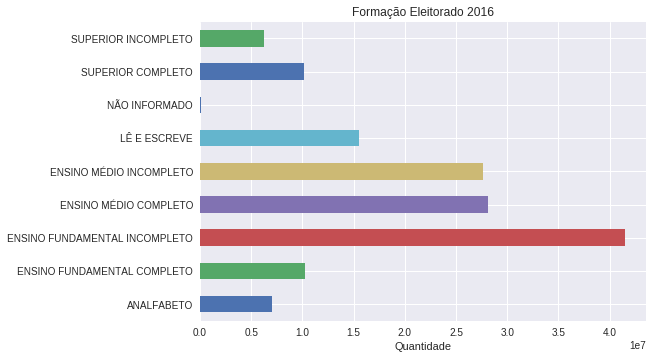

In [87]:
hist = df.groupby(['formacao']).sum()['qtd'].plot.barh(title="Formação Eleitorado 2016")
hist.set_ylabel('')
hist.set_xlabel('Quantidade')